In [3]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame as df
import pandas_datareader.data as web
from datetime import date
import matplotlib.pyplot as plt
import csv

In [32]:
def get_sp_data():
    sdate = date(2016,1,3)
    edate = date(2017,1,16)

    sp = web.DataReader('^GSPC','yahoo',sdate, edate)
    return sp

# get_sp_data()

1829.079956


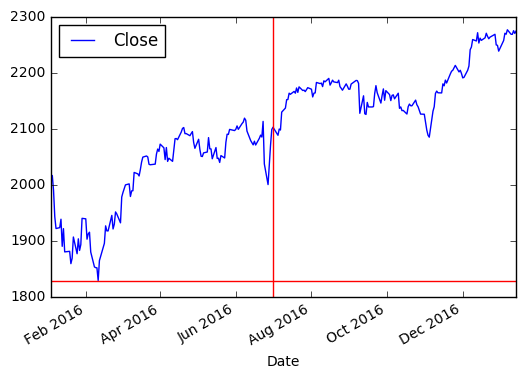

In [34]:
def plot_price():
    sp = get_sp_data()
    data = pd.DataFrame(sp['Close'], index=sp.index)
    
    min_close_price = pd.DataFrame.min(sp['Close'])
    print(min_close_price)
    data.plot()
    
    verical_line = plt.axvline(date(2016,7,1), linewidth=1, color='r')
    horizontal_line = plt.axhline(y=min_close_price, linewidth=1, color='r')
    plt.show()
    plt.savefig('SPYPrice2015.pdf', format='pdf')

plot_price()



In [35]:
def monthly_returns():
    sp = get_sp_data()
    sp_monthly = sp.resample('MS').mean()
    data = pd.DataFrame(sp_monthly['Adj Close'], index=sp_monthly.index)
    data[['sp_returns']] = (data[['Adj Close']]/data[['Adj Close']].shift(1)-1 )*100
    print(data[['sp_returns']])
    sp_returns = pd.DataFrame(data[['sp_returns']], columns =['sp_returns'])
    sp_returns.to_csv('SPYReturn.csv')

monthly_returns()

            sp_returns
Date                  
2016-01-01         NaN
2016-02-01   -0.739050
2016-03-01    6.171732
2016-04-01    2.649968
2016-05-01   -0.481069
2016-06-01    0.887942
2016-07-01    3.119674
2016-08-01    1.329990
2016-09-01   -0.908903
2016-10-01   -0.679895
2016-11-01    1.024943
2016-12-01    3.771081
2017-01-01    1.053917
